In [175]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [176]:
# --- Load CSV ---
df = pd.read_csv(r"C:\Users\grace\Documents\ERP\TextFiles\test\text\app\stem_organization.csv", encoding="utf-8", on_bad_lines='skip')
df=df.dropna(subset=['pred_organization', 'organization'])
true_labels = df["organization"]
pred_labels = df["pred_organization"]


# --- Metrics ---
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average="weighted", zero_division=0)
recall = recall_score(true_labels, pred_labels, average="weighted", zero_division=0)
f1 = f1_score(true_labels, pred_labels, average="weighted", zero_division=0)

# --- Print results ---
print(f"{accuracy:.4f}")
print(f"{precision:.4f}")
print(f"{recall:.4f}")
print(f"{f1:.4f}")

fp_mask = (pred_labels != "not_statement") & (true_labels == "not_statement")

false_positives = np.sum(fp_mask)
print(false_positives)
print(len(df))


0.5120
0.5022
0.5120
0.4995
0
166


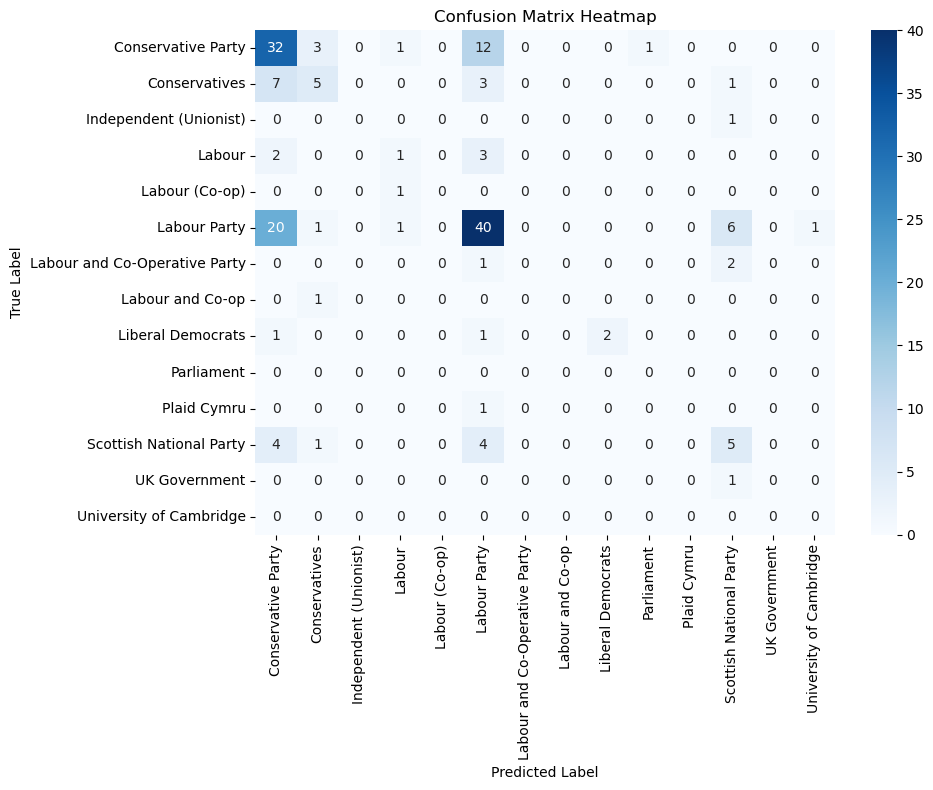

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = sorted(list(set(true_labels) | set(pred_labels)))  # all unique class labels
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

# --- Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,         # show numbers
    fmt="d",            # integer format
    cmap="Blues",       # color scheme
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()